In [57]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 


data = pd.read_csv("/Users/mehrac/Desktop/DSA-Python/USA_Housing.csv")

<Axes: >

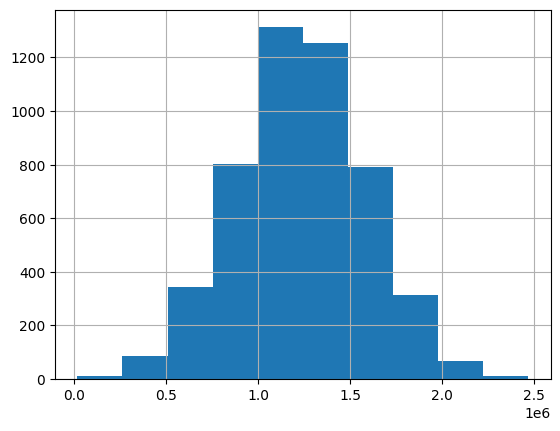

In [59]:
data["Price"].hist()

1. Data Inspection

In [51]:
#inspection
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101"
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958"
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489"
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [18]:
data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [3]:
data.shape

(5000, 7)

In [20]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [3]:
# checking for missign values
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

2 Lets Check VIF scores of columns



In [3]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


X_vif = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X_vif['const'] = 1

vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, x) for x in range(X_vif.shape[1])]

print(vif)


                       Variable         VIF
0              Avg. Area Income    1.001159
1           Avg. Area House Age    1.000577
2     Avg. Area Number of Rooms    1.273535
3  Avg. Area Number of Bedrooms    1.274413
4               Area Population    1.001266
5                         const  143.857530


/var/folders/rv/wpnq3fw11xj73scqdshzpm000000gn/T/ipykernel_22826/2312193534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_vif['const'] = 1


Corr between columns

In [7]:
X_vif.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,const
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,NaN
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,NaN
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,NaN
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,NaN
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,NaN
const,NaN,NaN,NaN,NaN,NaN,NaN


Lets try to get State out of Address string and categorize states by main regions in USA: <br> <br> Western <br> Midwestern   <br> Eastern <br> Southern <br> Non-Contiguous <br> Other


In [5]:
pd.set_option('display.max_colwidth', 100)
data["Address"]


0          208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101
1          188 Johnson Views Suite 079\nLake Kathleen, CA 48958
2           9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489
3                                     USS Barnett\nFPO AP 44820
4                                    USNS Raymond\nFPO AE 09386
                                 ...                           
4995                           USNS Williams\nFPO AP 30153-7653
4996                      PSC 9258, Box 8489\nAPO AA 42991-3352
4997     4215 Tracy Garden Suite 076\nJoshualand, VA 01707-9165
4998                                  USS Wallace\nFPO AE 73316
4999    37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595
Name: Address, Length: 5000, dtype: object

In [53]:
import re

def extract_state(address):
    pattern = r'\b[A-Z]{2}\b'  # Uppercase state abbreviation pattern
    match = re.search(pattern, address)
    if match:
        return match.group()
    else:
        return None

# Apply the extract_state function to the "Address" column and save the result as a new column "State"
data['State'] = data['Address'].apply(lambda x: extract_state(x))

# Print the updated DataFrame
print(data["State"])

0       NE
1       CA
2       WI
3       AP
4       AE
        ..
4995    AP
4996    AA
4997    VA
4998    AE
4999    NV
Name: State, Length: 5000, dtype: object


In [54]:
data["State"].unique()

array(['NE', 'CA', 'WI', 'AP', 'AE', 'KS', 'CO', 'TN', 'AA', 'NM', 'PW',
       'AR', 'HI', 'ME', 'IN', 'MI', 'DE', 'AZ', 'MA', 'MN', 'AL', 'NY',
       'NV', 'VA', 'ID', 'OK', 'NH', 'MO', 'WV', 'WY', 'MH', 'UT', 'SD',
       'CT', 'AK', 'WA', 'RI', 'NJ', 'KY', 'NC', 'IA', 'VT', 'FM', 'ND',
       'LA', 'MP', 'OR', 'TX', 'DC', 'PR', 'MT', 'AS', 'OH', 'MS', 'IL',
       'VI', 'GA', 'PA', 'MD', 'SC', 'GU', 'FL'], dtype=object)

In [55]:
#lets assign states to their region
region_mapping = {
    'Western': ['CO', 'ID', 'MT', 'UT', 'WY', 'CA', 'OR', 'WA', 'NV'],
    'Midwestern': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'Eastern': ['CT', 'DE', 'ME', 'MD', 'MA', 'NH', 'NJ', 'NY', ' PA', 'RI', 'VT', 'AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'],
    'Southern': ['AZ', 'NM', 'OK', 'TX'],
    'Non-Contiguous': ['AK', 'HI'],
    'Other' : ['AP', 'AE', 'AS', 'MH', 'FM', 'GU', 'PR', 'MP', 'VI', 'PW', 'AA', 'NM', 'DC', 'VI']}


region_to_numeric = {region: idx for idx, region in enumerate(region_mapping)}

# Map states to regions, then map regions to numerical values
data['Region'] = data['State'].map({state: region for region, states in region_mapping.items() for state in states})
data['Encoded_Region'] = data['Region'].map(region_to_numeric)

#filling remaining NaN adresses with Other = 5 label encoding
data['Encoded_Region'] = data['Encoded_Region'].fillna(5)

# Display the resulting DataFrame
data.head()



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State,Region,Encoded_Region
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",NE,Midwestern,1.0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA 48958",CA,Western,0.0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489",WI,Midwestern,1.0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,AP,Other,5.0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,AE,Other,5.0


In [15]:
data["Encoded_Region"].isnull().sum()


0

3. Split Data into depenend "Y" and independent "X" variable. One with encoded states and one without

In [8]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address',
       'State', 'Region', 'Encoded_Region'],
      dtype='object')

In [9]:
X = data[[   'Avg. Area Income',
             'Avg. Area House Age', 
             'Avg. Area Number of Rooms',
             'Avg. Area Number of Bedrooms',
             'Area Population'
             ]]
y = data['Price']

In [16]:
X1 = data[[   'Avg. Area Income',  
             'Avg. Area House Age', 
             'Avg. Area Number of Rooms',
             'Area Population',
             'Avg. Area Number of Bedrooms',
             'Encoded_Region'
             ]]
y1 = data['Price']

Do the Linear Regression without label encoding of States

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1




,Actual,Predicted
398,8.942511e+05,9.713052e+05
3833,9.329794e+05,9.547172e+05
4836,9.207479e+05,9.075616e+05
4572,6.918549e+05,4.932514e+05
636,7.327332e+05,7.178465e+05
2545,9.452522e+05,1.050148e+06
1161,6.244828e+05,7.127497e+05
2230,8.495661e+05,7.867304e+05
148,1.544380e+06,1.804401e+06
2530,1.535262e+06,1.538825e+06


Do the Linear Regression with Label Encoding of States

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X1_train, y1_train)

coeff_df1 = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df1

y1_pred = regressor.predict(X1_test)

df_without = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df2 = df_without.head(25)
df2

,Actual,Predicted
398,8.942511e+05,9.687106e+05
3833,9.329794e+05,9.521511e+05
4836,9.207479e+05,9.033801e+05
4572,6.918549e+05,4.890280e+05
636,7.327332e+05,7.170284e+05
2545,9.452522e+05,1.054468e+06
1161,6.244828e+05,7.085445e+05
2230,8.495661e+05,7.843148e+05
148,1.544380e+06,1.808725e+06
2530,1.535262e+06,1.534668e+06


In [25]:
r_sq_without_encoding = (r2_score(y_test.to_numpy().reshape(-1,1), y_pred.reshape(-1,1)))
r_sq_with_encoding = (r2_score(y1_test.to_numpy().reshape(-1,1), y1_pred.reshape(-1,1)))

In [27]:
print("r2_score without state encoding:", r_sq_without_encoding)
print("r2_score with state encoding:", r_sq_with_encoding)

r2_score without state encoding: 0.9146454505137862
r2_score with state encoding: 0.9145794694961871


Result : state label encoding did not make the model more efficient

Oulier varsa, Robust scaler luchshe. 

esli outliner netu, to luchshe ispolzovat standart scaler



Lets apply Standart Scaler to new model

In [33]:
data.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State,Region,Encoded_Region
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101",NE,Midwestern,1.0


In [37]:
array = data.values 
array[:, 0:5]

array([[79545.45857431678, 5.682861321615587, 7.009188142792237, 4.09,
        23086.800502686456, 1059033.5578701235],
       [79248.64245482568, 6.0028998082752425, 6.730821019094919, 3.09,
        40173.07217364482, 1505890.91484695],
       [61287.067178656784, 5.865889840310001, 8.512727430375099, 5.13,
        36882.15939970458, 1058987.9878760849],
       ...,
       [63390.68688550463, 7.250590614779546, 4.805080980291155, 2.13,
        33266.145489652175, 1030729.5831522896],
       [68001.33123508695, 5.534388416220344, 7.130143864349472, 5.44,
        42625.62015585088, 1198656.8724076871],
       [65510.581803666224, 5.992305307333977, 6.792336104424982, 4.07,
        46501.28380314165, 1298950.4802669554]], dtype=object)

In [47]:
array = data.values 
Xs= array[:,0:5] 
ys = array[:,6] 
scaler = StandardScaler().fit(Xs) 
rescaledX = scaler.transform(Xs) 


In [42]:
rescaledX

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

Feeding rescaled values into the model

In [43]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X1, y1, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(Xs_train, ys_train)

coeff_df1 = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])  
coeff_df1

ys_pred = regressor.predict(Xs_test)

df_without = pd.DataFrame({'Actual': ys_test, 'Predicted': y1_pred})
df2 = df_without.head(25)
df2

,Actual,Predicted
398,8.942511e+05,9.687106e+05
3833,9.329794e+05,9.521511e+05
4836,9.207479e+05,9.033801e+05
4572,6.918549e+05,4.890280e+05
636,7.327332e+05,7.170284e+05
2545,9.452522e+05,1.054468e+06
1161,6.244828e+05,7.085445e+05
2230,8.495661e+05,7.843148e+05
148,1.544380e+06,1.808725e+06
2530,1.535262e+06,1.534668e+06


In [49]:
r_sq_scaled = (r2_score(ys_test.to_numpy().reshape(-1,1), ys_pred.reshape(-1,1)))
print("r2_score_scaled:", r_sq_scaled)
print('r_sq_with_encoding:', r_sq_with_encoding)
print("r_sq_without_encoding:", r_sq_without_encoding)

r2_score_scaled: 0.9145794694961871
r_sq_with_encoding: 0.9145794694961871
r_sq_without_encoding: 0.9146454505137862
